# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
%pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [3]:
cities

['iskateley',
 'olonkinbyen',
 'haiku-pauwela',
 'ribeira grande',
 'basse-terre',
 'strathalbyn',
 'carnarvon',
 'sungjibaegam',
 'edinburgh of the seven seas',
 'tiksi',
 'vila velha',
 'vorgashor',
 'hit',
 'igarka',
 'grytviken',
 'whitehorse',
 'lompoc',
 'taiohae',
 'bethel',
 'bikenibeu village',
 'wailea',
 'posto fiscal rolim de moura',
 'port-aux-francais',
 'ushuaia',
 'al jubayl',
 'bilibino',
 'east london',
 'tralee',
 'yellowknife',
 'adamstown',
 'salaqi',
 'hovd',
 'constantia',
 'waitangi',
 'viedma',
 'neiafu',
 'suva',
 'la passe',
 'sinabang',
 "musay'id",
 'coahuayana de hidalgo',
 'tarinkot',
 'ust-nera',
 'al-`ula',
 'belel',
 'fale old settlement',
 'badger',
 'college',
 'bezhetsk',
 'tan-tan',
 'stanley',
 'manismata',
 'kristiansund',
 'dynow',
 "'ohonua",
 'maues',
 'anadyr',
 'blackmans bay',
 'ladario',
 'hemsby',
 'thinadhoo',
 'longyearbyen',
 'arraias',
 'kyren',
 "ust'-barguzin",
 'lebu',
 'luderitz',
 'utrik',
 'margaret river',
 'ancud',
 'ilulissat

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:

url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
# this url does not work
print(url + "san francisco")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=de30464ec8fa002596b1f63c02ab2e9dsan francisco


In [5]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
# this url does work
#this is because the &q is specifying the query 
print(url + "&q=san francisco")


https://api.openweathermap.org/data/2.5/weather?units=metric&appid=de30464ec8fa002596b1f63c02ab2e9d&q=san francisco


In [6]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | haiku-pauwela
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | basse-terre
Processing Record 6 of Set 1 | strathalbyn
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | sungjibaegam
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | vila velha
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | hit
Processing Record 14 of Set 1 | igarka
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | lompoc
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | bikenibeu village
Processing Record 21 of Set 1 | wailea
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,3.81,82,11,7.19,RU,1695349488
1,olonkinbyen,70.9221,-8.7187,2.10,92,96,6.52,SJ,1695349488
2,haiku-pauwela,20.9219,-156.3051,25.28,78,75,8.75,US,1695349489
3,ribeira grande,38.5167,-28.7000,21.54,77,42,5.81,PT,1695349489
4,basse-terre,16.1667,-61.6667,23.58,94,0,0.00,GP,1695349490


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,3.81,82,11,7.19,RU,1695349488
1,olonkinbyen,70.9221,-8.7187,2.10,92,96,6.52,SJ,1695349488
2,haiku-pauwela,20.9219,-156.3051,25.28,78,75,8.75,US,1695349489
3,ribeira grande,38.5167,-28.7000,21.54,77,42,5.81,PT,1695349489
4,basse-terre,16.1667,-61.6667,23.58,94,0,0.00,GP,1695349490


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

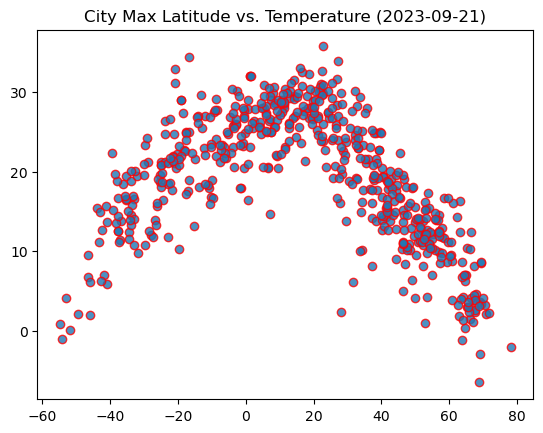

In [11]:
import time
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolors="red",
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

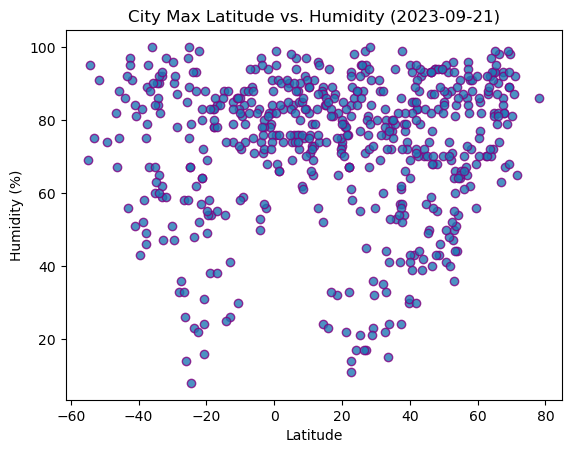

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolors="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

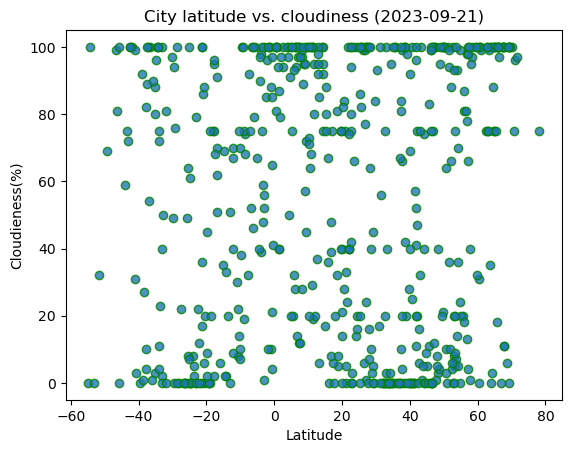

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolors="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City latitude vs. cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudieness(%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [14]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,3.81,82,11,7.19,RU,1695349488
1,olonkinbyen,70.9221,-8.7187,2.10,92,96,6.52,SJ,1695349488
2,haiku-pauwela,20.9219,-156.3051,25.28,78,75,8.75,US,1695349489
3,ribeira grande,38.5167,-28.7000,21.54,77,42,5.81,PT,1695349489
4,basse-terre,16.1667,-61.6667,23.58,94,0,0.00,GP,1695349490
...,...,...,...,...,...,...,...,...,...
561,nieuw amsterdam,5.8833,-55.0833,25.09,90,32,3.44,SR,1695349740
562,languyan,5.2618,120.0807,29.50,69,100,5.87,PH,1695349741
563,kaiapoi,-43.3783,172.6401,11.16,92,75,4.63,NZ,1695349741


#### Latitude vs. Wind Speed Plot

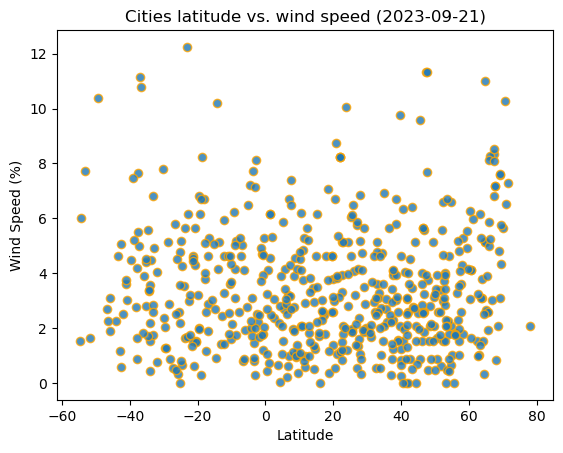

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolors="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"Cities latitude vs. wind speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    # Compute the linear regression 

    (slope, intercept, rvalue, pvalue, stderr,) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-") 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,3.81,82,11,7.19,RU,1695349488
1,olonkinbyen,70.9221,-8.7187,2.10,92,96,6.52,SJ,1695349488
2,haiku-pauwela,20.9219,-156.3051,25.28,78,75,8.75,US,1695349489
3,ribeira grande,38.5167,-28.7000,21.54,77,42,5.81,PT,1695349489
4,basse-terre,16.1667,-61.6667,23.58,94,0,0.00,GP,1695349490


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,strathalbyn,-35.2667,138.9000,19.39,60,3,2.79,AU,1695349490
6,carnarvon,-24.8667,113.6333,21.18,67,0,5.18,AU,1695349490
8,edinburgh of the seven seas,-37.0676,-12.3116,11.42,67,54,11.16,SH,1695349491
10,vila velha,-20.3297,-40.2925,22.19,88,20,1.54,BR,1695349492
14,grytviken,-54.2811,-36.5092,-1.11,95,100,6.01,GS,1695349494


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7297095016802987


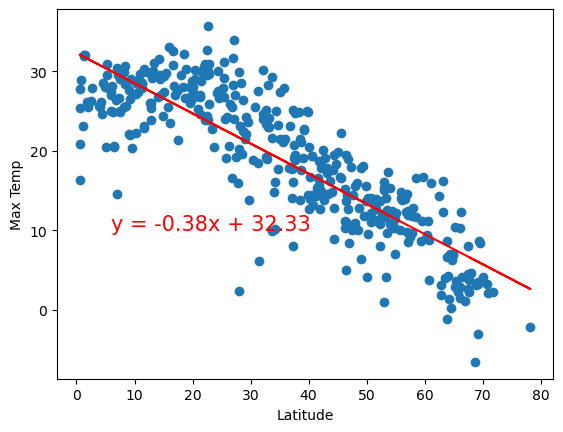

In [19]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"] 
plot_linear_regression(x_value, y_value, "Max Temp", (6, 10))

The r-value is 0.5702152269337897


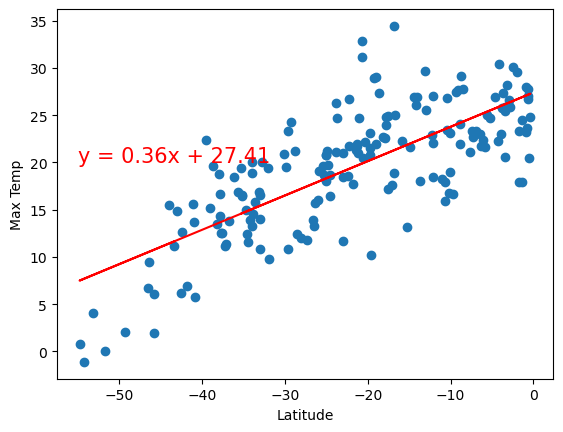

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:

# The linear regression plot for the northern hemisphere shows that as the latitude increases, the maximum temperature decreases.

# Aditionally, for the inverse on the southern hemisphere, with increasing latitude, there is increasing temperature aswell.

# The correlation bewteen the two graphs shows: regions farther from the equator tend to be colder in the northern hemisphere.

# Also the analysis shows that pattern of increasing warmth closer to the equator in the southern hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0004060332937036455


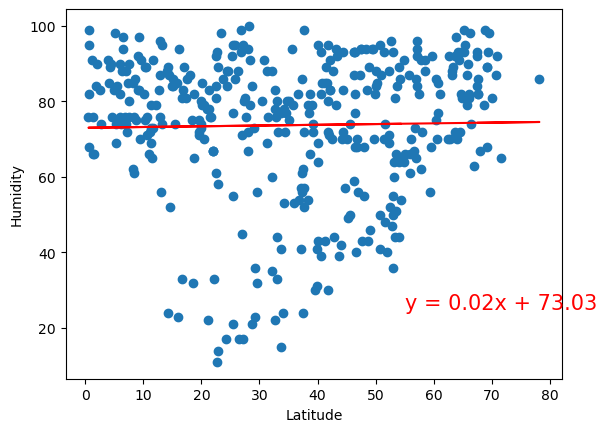

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (55, 25))

The r-value is 0.0002278416125680858


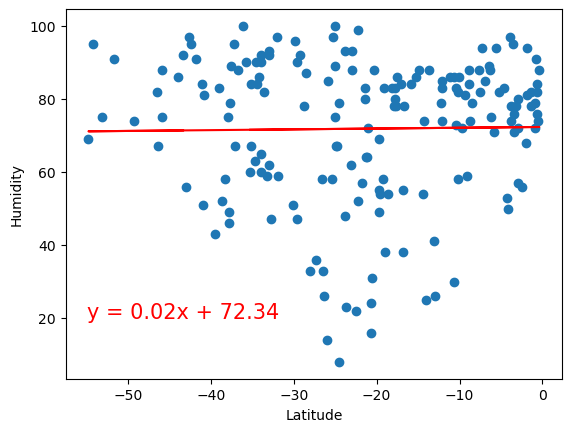

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 20))

In [ ]:
# The first graph show that in general, the northern hemisphere has higher humidity in all latitudes low or high. There are some outliers in latitudes between 15-45 latitude showing low humidity. 
# The second graph shows that there is high humidity throughout all latitudes, yet higher latitudes between -15 to 0 have a higher density in high humidity data points. Additionally, in ranges -30 to -20, there is high variation in all humidity from low to high. Ultimately, it shows the southern hemisphere has generally higher humidity in all latitudes with an emphasis in high latitude. 


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0016337009749961449


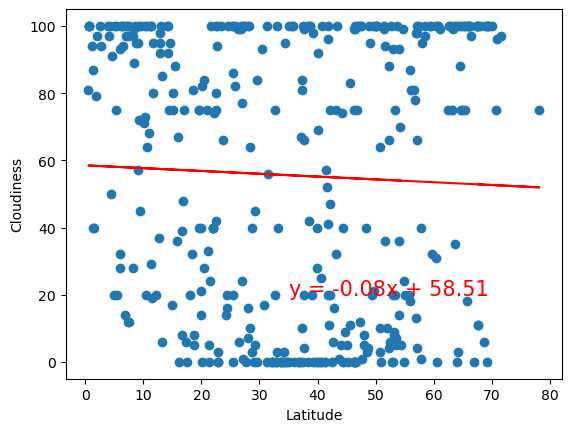

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (35, 20))

The r-value is 0.003251843771991858


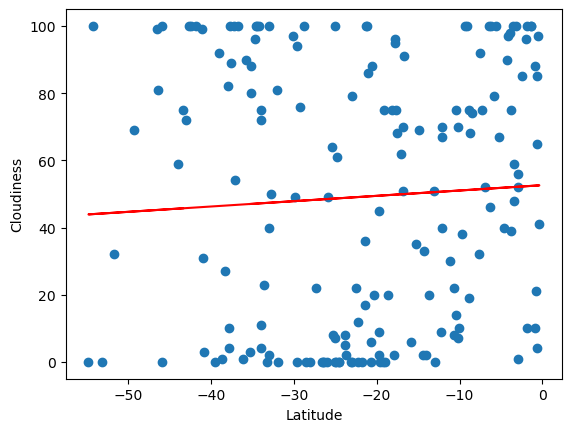

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (35, 20))

In [ ]:
# In the southern hemisphere there is a density of high cloudiness and low cloudiness in almost all latitudes. more specifically, there is low cloudiness in latitudes between 20-50. There are also outliers throughout all latitudes with an emphasis. 
# In the northern hemisphere, There is not much correlation to the original function line. The data is very randomized throughout the graph. Yet there seems to be alot of density in low cloudiness from latitudes -40 to -15. 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.02398251425953215


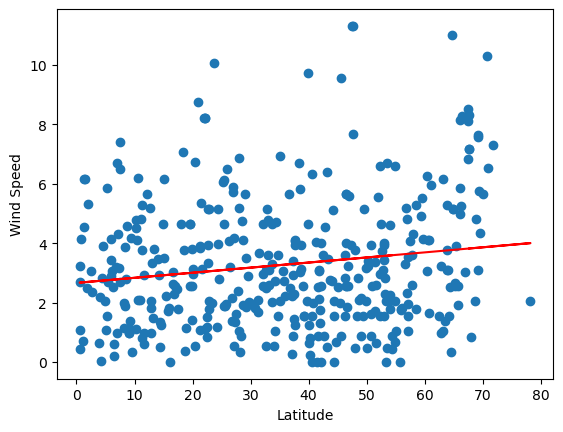

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.004599991311323576


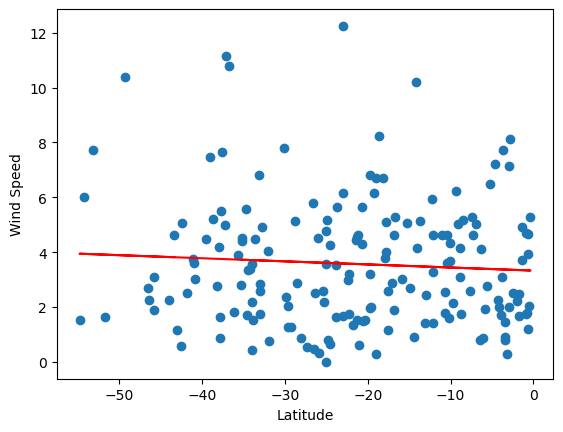

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (25, 15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#In the northern hemisphere, there is very high density in low to medium wind speeds from lats -1 to 70 with a sharp cutoff after 70. There are some outliers with high wind speeds yet these are far and few. The summary of this zone seems to indicate that the wind speeds are generally lower in the northern hemisphere. Yet they do not seem to correlate with the function line that suggests wind speed increases with latitude. 
#As for the southern hemisphere, wind speeds remain between 0-6 in latitudes -45 to 0. This shows that there is a higher density of medium wind speeds as the latitude increases/ there are few outliers to be considered. 